In [161]:
# Data processing
import pandas as pd
import numpy as np

# Preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Machine learning 
from sklearn.ensemble import RandomForestClassifier
from sklearn.dummy import DummyClassifier

# Evaluating Performance
from sklearn.metrics import classification_report, roc_curve, roc_auc_score


# Visualisation
import matplotlib.pyplot as plt
%matplotlib inline

source_csv = '/home/andris/GitHub/data/churn_prediction/usr_with_tch_complete.csv'

In [162]:
# Reading the dataframe 
df = pd.read_csv(source_csv)

# Show the first 5 rows
df.head()

,user_id,event_leg,grp_add_assig,grp_add_assig_tot,grp_add_user,grp_add_user_tot,grp_added,play_video,q_lvl_0,q_lvl_0_cor,...,tch_add_user_tot,tch_added,tch_attempt,tch_attempt_tot,tch_create_group,tch_create_group_tot,tch_view_assig_prog,tch_view_assig_prog_tot,view_concept,view_hint
0,0009111939b7d071597369a67002b22853c08e19f463cf...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,321.0,137.0,...,109.0,1.0,13.0,59.0,0.0,0.0,36.0,58.0,3.0,5.0
1,0009111939b7d071597369a67002b22853c08e19f463cf...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,50.0,30.0,...,110.0,0.0,14.0,73.0,1.0,1.0,19.0,77.0,3.0,0.0
2,0009111939b7d071597369a67002b22853c08e19f463cf...,2.0,0.0,0.0,0.0,0.0,0.0,0.0,108.0,44.0,...,110.0,0.0,2.0,75.0,0.0,1.0,4.0,81.0,0.0,0.0
3,0009111939b7d071597369a67002b22853c08e19f463cf...,3.0,0.0,0.0,0.0,0.0,0.0,0.0,34.0,11.0,...,110.0,0.0,0.0,75.0,0.0,1.0,2.0,83.0,0.0,0.0
4,0009111939b7d071597369a67002b22853c08e19f463cf...,4.0,0.0,0.0,0.0,0.0,0.0,0.0,29.0,11.0,...,110.0,0.0,4.0,79.0,0.0,1.0,4.0,87.0,1.0,0.0


In [163]:
# Remove users who didn't have any activity in month 0
min_months = df.groupby('user_id')['event_leg'].min()
min_months = min_months[min_months == 0]

# Update the dataframe
df = df.set_index('user_id').loc[min_months.index]

df.head()

,event_leg,grp_add_assig,grp_add_assig_tot,grp_add_user,grp_add_user_tot,grp_added,play_video,q_lvl_0,q_lvl_0_cor,q_lvl_1,...,tch_add_user_tot,tch_added,tch_attempt,tch_attempt_tot,tch_create_group,tch_create_group_tot,tch_view_assig_prog,tch_view_assig_prog_tot,view_concept,view_hint
user_id,,,,,,,,,,,,,,,,,,,,,
0009111939b7d071597369a67002b22853c08e19f463cf225f985d51a28c00e0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,321.0,137.0,4.0,...,109.0,1.0,13.0,59.0,0.0,0.0,36.0,58.0,3.0,5.0
0009111939b7d071597369a67002b22853c08e19f463cf225f985d51a28c00e0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,50.0,30.0,0.0,...,110.0,0.0,14.0,73.0,1.0,1.0,19.0,77.0,3.0,0.0
0009111939b7d071597369a67002b22853c08e19f463cf225f985d51a28c00e0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,108.0,44.0,0.0,...,110.0,0.0,2.0,75.0,0.0,1.0,4.0,81.0,0.0,0.0
0009111939b7d071597369a67002b22853c08e19f463cf225f985d51a28c00e0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,34.0,11.0,0.0,...,110.0,0.0,0.0,75.0,0.0,1.0,2.0,83.0,0.0,0.0
0009111939b7d071597369a67002b22853c08e19f463cf225f985d51a28c00e0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,29.0,11.0,0.0,...,110.0,0.0,4.0,79.0,0.0,1.0,4.0,87.0,1.0,0.0


## Predicting churn after month 0

Users last month of activity can be in month 0, after which some leave the platform, here we predict the users that leave

In [164]:
# Find the churn month of each user
churn_array = df.groupby('user_id')['event_leg'].max()

# Define last_month of user activity
last_month = 0

# Remove all rows that have data after those months
df_lm = df[df['event_leg']<=last_month]

# Adapt churn_array appropriately 
churn_array = churn_array[churn_array>=last_month]

# Create labels for churn and not churn
label = [0 if item > last_month else 1 for item in churn_array]

# Checking the lengths (they have to be the same)
print(len(label))
print(len(np.unique(df.index)))

# Print dataframe
df.head()

8749
8749


,event_leg,grp_add_assig,grp_add_assig_tot,grp_add_user,grp_add_user_tot,grp_added,play_video,q_lvl_0,q_lvl_0_cor,q_lvl_1,...,tch_add_user_tot,tch_added,tch_attempt,tch_attempt_tot,tch_create_group,tch_create_group_tot,tch_view_assig_prog,tch_view_assig_prog_tot,view_concept,view_hint
user_id,,,,,,,,,,,,,,,,,,,,,
0009111939b7d071597369a67002b22853c08e19f463cf225f985d51a28c00e0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,321.0,137.0,4.0,...,109.0,1.0,13.0,59.0,0.0,0.0,36.0,58.0,3.0,5.0
0009111939b7d071597369a67002b22853c08e19f463cf225f985d51a28c00e0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,50.0,30.0,0.0,...,110.0,0.0,14.0,73.0,1.0,1.0,19.0,77.0,3.0,0.0
0009111939b7d071597369a67002b22853c08e19f463cf225f985d51a28c00e0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,108.0,44.0,0.0,...,110.0,0.0,2.0,75.0,0.0,1.0,4.0,81.0,0.0,0.0
0009111939b7d071597369a67002b22853c08e19f463cf225f985d51a28c00e0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,34.0,11.0,0.0,...,110.0,0.0,0.0,75.0,0.0,1.0,2.0,83.0,0.0,0.0
0009111939b7d071597369a67002b22853c08e19f463cf225f985d51a28c00e0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,29.0,11.0,0.0,...,110.0,0.0,4.0,79.0,0.0,1.0,4.0,87.0,1.0,0.0


(array([ 6307.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,  2442.]),
 array([ 0. ,  0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ]),
 <a list of 10 Patch objects>)

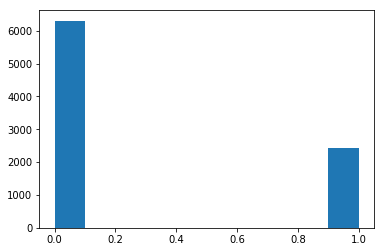

In [165]:
# Fill the nan
df_lm = df_lm.fillna(0)

plt.hist(label)

In [166]:
# Assign data to auxillary variables
X = df_lm.drop('event_leg',axis=1)
y = label

# Storing the keys
store_keys = X.keys

# Scale the data
scaler = StandardScaler()
X_trf = scaler.fit_transform(X)
X = X_trf

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size = 0.3)

In [167]:
# Do a test with a Dummy Classifier

clf = DummyClassifier()
clf.fit(X_train,y_train)

# Predict
y_pred = clf.predict(X_test)

# Evaluate

print(classification_report(y_pred,y_test))


             precision    recall  f1-score   support

          0       0.71      0.73      0.72      1858
          1       0.30      0.29      0.29       767

avg / total       0.59      0.60      0.60      2625



             precision    recall  f1-score   support

          0       0.93      0.90      0.91      1959
          1       0.73      0.79      0.76       666

avg / total       0.88      0.87      0.87      2625



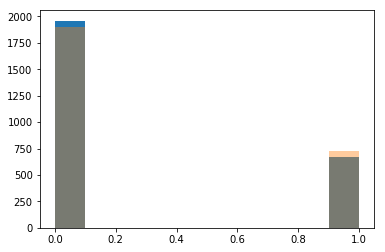

In [168]:
# Train an ML model

clf = RandomForestClassifier(n_estimators=100)
clf.fit(X_train,y_train)

# Predict
y_pred = clf.predict(X_test)
y_score = clf.predict_proba(X_test)

# Evaluate
plt.hist(y_pred)
plt.hist(y_test,alpha= 0.4)

print(classification_report(y_pred,y_test))


0.92640917899533726

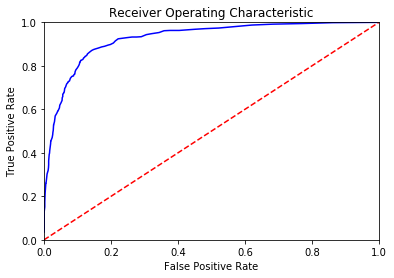

In [169]:
# ROC curve to better guage model performance

fpr, tpr, threshold = roc_curve(y_test, y_score[:,1])
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

roc_auc_score(y_test,y_score[:,1])

/home/andris/anaconda/lib/python3.6/site-packages/numpy/core/fromnumeric.py:57: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


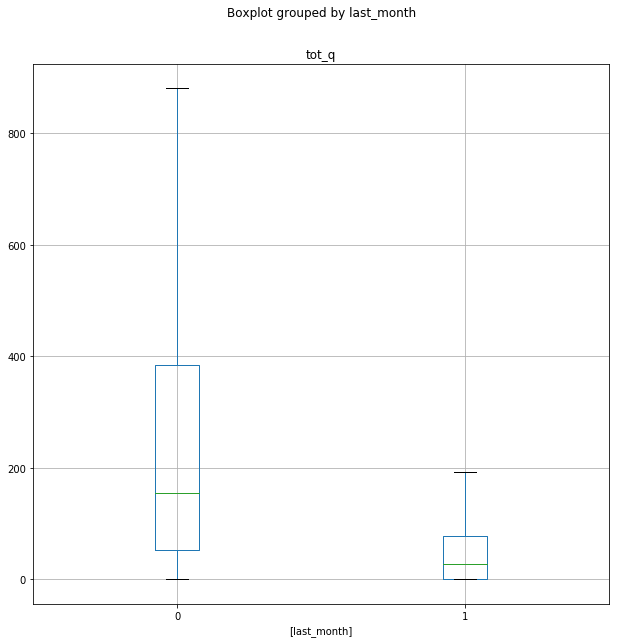

In [170]:
df_new = df_lm
df_new['last_month'] = label

df_new['tot_q'] = df_lm.filter(regex='q_').sum(axis=1) 

df_new[['tot_q','last_month']].boxplot(by='last_month',showfliers=False,figsize=(10,10))

## Predicting churn after month 3

Here we try to do the same as before, but this time employing more months

In [293]:
# Find the churn month of each user
churn_array = df.groupby('user_id')['event_leg'].max()

# Define last_month of user activity
last_month = 3

# Adapt churn_array appropriately 
churn_array = churn_array[churn_array>=last_month]

# Remove all rows that have data after those months
df_lm = df[df['event_leg']<=last_month]

# Remove all users that have already churned
df_lm = df_lm.loc[churn_array.index]

# Create labels for churn and not churn
label = [0 if item > last_month else 1 for item in churn_array]

# Checking the lengths (they have to be the same)
print(len(label))
print(len(np.unique(df_lm.index)))

# Print dataframe
df_lm.head()

5110
5110


,event_leg,grp_add_assig,grp_add_assig_tot,grp_add_user,grp_add_user_tot,grp_added,play_video,q_lvl_0,q_lvl_0_cor,q_lvl_1,...,tch_add_user_tot,tch_added,tch_attempt,tch_attempt_tot,tch_create_group,tch_create_group_tot,tch_view_assig_prog,tch_view_assig_prog_tot,view_concept,view_hint
user_id,,,,,,,,,,,,,,,,,,,,,
0009111939b7d071597369a67002b22853c08e19f463cf225f985d51a28c00e0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,321.0,137.0,4.0,...,109.0,1.0,13.0,59.0,0.0,0.0,36.0,58.0,3.0,5.0
0009111939b7d071597369a67002b22853c08e19f463cf225f985d51a28c00e0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,50.0,30.0,0.0,...,110.0,0.0,14.0,73.0,1.0,1.0,19.0,77.0,3.0,0.0
0009111939b7d071597369a67002b22853c08e19f463cf225f985d51a28c00e0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,108.0,44.0,0.0,...,110.0,0.0,2.0,75.0,0.0,1.0,4.0,81.0,0.0,0.0
0009111939b7d071597369a67002b22853c08e19f463cf225f985d51a28c00e0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,34.0,11.0,0.0,...,110.0,0.0,0.0,75.0,0.0,1.0,2.0,83.0,0.0,0.0
001209cc56f8583d638502e7446dd7461278082d613d4c6d718b5b3fb6d87a72,0.0,0.0,5.0,2.0,5.0,2.0,3.0,348.0,134.0,0.0,...,55.0,1.0,33.0,477.0,0.0,3.0,66.0,136.0,0.0,13.0


(array([ 4853.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,   257.]),
 array([ 0. ,  0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ]),
 <a list of 10 Patch objects>)

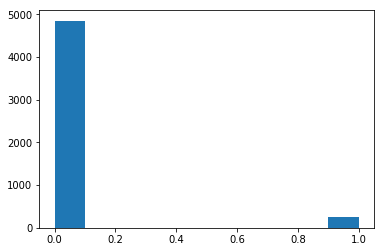

In [294]:
# Checking the distribution
plt.hist(label)

In [173]:
# Now we can choose how to inorporate the timeseries data
# 1) Just sum over all instances
# 2) Put them as additional features
# 3) What else?

# Here we add a function that does this

def prepare_time_series(df, month_array, type_operation, groupby_feature = 'user_id'):
    
    # If we want to append each month as a seperate feature 
    if type_operation == 'append':
        
        # Find the months of interest
        df_new = df[df.index.get_level_values(1).isin(month_array)].unstack().fillna(0)
        
        # Name new columns
        new_cols = [str(item[0]) + '_' + str(int(item[1])) for item in df_new.columns]
        
        # Drop level and rename
        df_new.columns = df_new.columns.droplevel(0)
        df_new.columns = new_cols
    
    # If we want to sum the values of each feature for every month
    elif type_operation == 'sum':
        df_new = df[df.index.get_level_values(1).isin(month_array)]
        df_new = df_new.reset_index().groupby(groupby_feature).sum()
    
    return df_new

### Append the features

Appending the features of each month

In [295]:
# Let's try appending the features

df_lm_new = prepare_time_series(df_lm.groupby(['user_id','event_leg']).sum(),[0,1,2,3],'append')

df_lm_new.head()

,grp_add_assig_0,grp_add_assig_1,grp_add_assig_2,grp_add_assig_3,grp_add_assig_tot_0,grp_add_assig_tot_1,grp_add_assig_tot_2,grp_add_assig_tot_3,grp_add_user_0,grp_add_user_1,...,tch_view_assig_prog_tot_2,tch_view_assig_prog_tot_3,view_concept_0,view_concept_1,view_concept_2,view_concept_3,view_hint_0,view_hint_1,view_hint_2,view_hint_3
user_id,,,,,,,,,,,,,,,,,,,,,
0009111939b7d071597369a67002b22853c08e19f463cf225f985d51a28c00e0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,81.0,83.0,3.0,3.0,0.0,0.0,5.0,0.0,0.0,0.0
001209cc56f8583d638502e7446dd7461278082d613d4c6d718b5b3fb6d87a72,0.0,1.0,0.0,0.0,5.0,6.0,6.0,0.0,2.0,0.0,...,140.0,0.0,0.0,0.0,0.0,0.0,13.0,0.0,0.0,0.0
001ed4483f258c0e1b75a205f24f7ec2b04490adbddb45eb9bcdb91d1ff1e9be,16.0,4.0,16.0,4.0,16.0,20.0,36.0,40.0,28.0,0.0,...,304.0,324.0,0.0,0.0,0.0,0.0,88.0,0.0,0.0,0.0
00310c09b913aa7e422aa50306010d12a23ad40d63eac99e37931f0448c131df,0.0,0.0,2.0,1.0,3.0,3.0,5.0,6.0,6.0,1.0,...,67.0,80.0,1.0,5.0,3.0,0.0,6.0,6.0,2.0,50.0
003136aacdfb6e7ee06bdd001b8c5351ddb3ad360c30bcac094c645f4f1cec68,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,475.0,578.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [227]:
# Fill in any zeros
df_lm_new = df_lm_new.fillna(0)

# Assign data to auxillary variables
X = df_lm_new
y = label

# Storing the keys
store_keys = X.keys()

# Scale the data
scaler = StandardScaler()
X_trf = scaler.fit_transform(X)
X = X_trf

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size = 0.3)

In [228]:
# Do a test with a Dummy Classifier

clf = DummyClassifier()
clf.fit(X_train,y_train)

# Predict
y_pred = clf.predict(X_test)

# Evaluate

print(classification_report(y_pred,y_test))


             precision    recall  f1-score   support

          0       0.95      0.94      0.95      1458
          1       0.04      0.04      0.04        75

avg / total       0.91      0.90      0.90      1533



             precision    recall  f1-score   support

          0       0.99      0.96      0.97      1505
          1       0.21      0.64      0.32        28

avg / total       0.98      0.95      0.96      1533



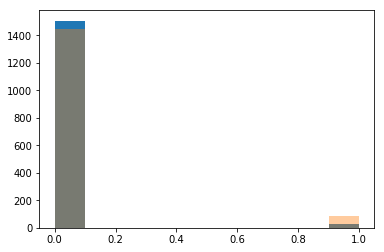

In [229]:
# Train an ML model

clf = RandomForestClassifier(n_estimators=100)
clf.fit(X_train,y_train)

# Predict
y_pred = clf.predict(X_test)
y_score = clf.predict_proba(X_test)

# Evaluate
plt.hist(y_pred)
plt.hist(y_test,alpha= 0.4)

print(classification_report(y_pred,y_test))


In [230]:
# Output feature importance

def return_feature_importance(X,y,keys,n_estimators = 100):

    # Using the random forest classifier, find out what are the main features that predict whether a user is likely to churn or not
    randomForest = RandomForestClassifier(n_estimators)
    randomForest.fit(X,y)
    
    importances = randomForest.feature_importances_
    
    indices = np.argsort(importances)[::-1]
    
    # Print the feature ranking
    print("Feature ranking:")
    
    for f in range(X.shape[1]):
        print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]),keys[indices[f]])

return_feature_importance(X,y,store_keys)

Feature ranking:
1. feature 88 (0.033393) tch_add_user_0
2. feature 24 (0.030831) q_lvl_0_0
3. feature 28 (0.029259) q_lvl_0_cor_0
4. feature 31 (0.024299) q_lvl_0_cor_3
5. feature 27 (0.023844) q_lvl_0_3
6. feature 87 (0.023115) tch_add_assig_tot_3
7. feature 123 (0.022500) tch_view_assig_prog_tot_3
8. feature 107 (0.020472) tch_attempt_tot_3
9. feature 84 (0.019868) tch_add_assig_tot_0
10. feature 116 (0.019004) tch_view_assig_prog_0
11. feature 95 (0.018951) tch_add_user_tot_3
12. feature 26 (0.018922) q_lvl_0_2
13. feature 25 (0.018892) q_lvl_0_1
14. feature 30 (0.018834) q_lvl_0_cor_2
15. feature 29 (0.017319) q_lvl_0_cor_1
16. feature 120 (0.017114) tch_view_assig_prog_tot_0
17. feature 118 (0.016905) tch_view_assig_prog_2
18. feature 122 (0.016876) tch_view_assig_prog_tot_2
19. feature 81 (0.016485) tch_add_assig_1
20. feature 86 (0.015722) tch_add_assig_tot_2
21. feature 16 (0.015701) grp_added_0
22. feature 121 (0.015589) tch_view_assig_prog_tot_1
23. feature 117 (0.015447) tc

### Summing

Sum the features and see if there is an improvement in the performance

In [283]:
# Now let's try summing the features


df_lm_new = prepare_time_series(df_lm.groupby(['user_id','event_leg']).sum(),[0,1,2,3,4,5],'sum')

df_lm_new.head()

,event_leg,grp_add_assig,grp_add_assig_tot,grp_add_user,grp_add_user_tot,grp_added,play_video,q_lvl_0,q_lvl_0_cor,q_lvl_1,...,tch_add_user_tot,tch_added,tch_attempt,tch_attempt_tot,tch_create_group,tch_create_group_tot,tch_view_assig_prog,tch_view_assig_prog_tot,view_concept,view_hint
user_id,,,,,,,,,,,,,,,,,,,,,
001ed4483f258c0e1b75a205f24f7ec2b04490adbddb45eb9bcdb91d1ff1e9be,15.0,52.0,212.0,68.0,328.0,68.0,8.0,440.0,296.0,36.0,...,1578.0,8.0,148.0,4482.0,0.0,36.0,456.0,2048.0,0.0,108.0
003136aacdfb6e7ee06bdd001b8c5351ddb3ad360c30bcac094c645f4f1cec68,15.0,0.0,0.0,0.0,0.0,0.0,0.0,84.0,61.0,0.0,...,1904.0,1.0,37.0,551.0,0.0,0.0,631.0,2948.0,0.0,0.0
0044dc72d0e63a3033b307204c084db1d9564fe30b22a851d48967cde00b31ec,15.0,25.0,85.0,13.0,114.0,13.0,0.0,216.0,157.0,0.0,...,488.0,1.0,132.0,680.0,1.0,6.0,447.0,2010.0,1.0,29.0
004db6a9bdcd57ad05125136226e25d08a061b31cbe839d8fe30a8d6b5533109,15.0,44.0,156.0,104.0,504.0,104.0,0.0,704.0,700.0,4.0,...,1574.0,8.0,128.0,1034.0,0.0,12.0,390.0,1612.0,0.0,28.0
005339b2c9f8f7f824580a1725131b5995c93b8a91a8f58de64bb24ee536c1c5,3.0,0.0,18.0,15.0,60.0,15.0,0.0,0.0,0.0,3.0,...,319.0,1.0,1.0,122.0,0.0,3.0,7.0,225.0,1.0,12.0


In [204]:
# Fill in any zeros
df_lm_new = df_lm_new.fillna(0)

# Assign data to auxillary variables
X = df_lm_new
y = label

# Storing the keys
store_keys = X.keys

# Scale the data
scaler = StandardScaler()
X_trf = scaler.fit_transform(X)
X = X_trf

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size = 0.3)

             precision    recall  f1-score   support

          0       0.99      0.96      0.98      1506
          1       0.22      0.63      0.32        27

avg / total       0.98      0.95      0.96      1533



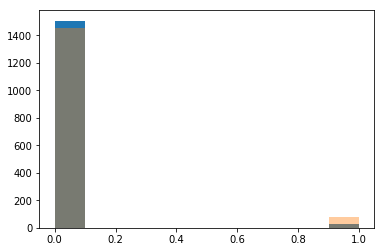

In [206]:
# Train an ML model

clf = RandomForestClassifier(n_estimators=100)
clf.fit(X_train,y_train)

# Predict
y_pred = clf.predict(X_test)
y_score = clf.predict_proba(X_test)

# Evaluate
plt.hist(y_pred)
plt.hist(y_test,alpha= 0.4)

print(classification_report(y_pred,y_test))

## Improving upon existing estimates

The code doesn't seem to care what we use which seems to imply that we should do some feature extraction. Here we try to do that.

In [284]:
# Choosing only a subset of features

'''
1. feature 88 (0.033393) tch_add_user_0
2. feature 24 (0.030831) q_lvl_0_0
3. feature 28 (0.029259) q_lvl_0_cor_0
4. feature 31 (0.024299) q_lvl_0_cor_3
5. feature 27 (0.023844) q_lvl_0_3
6. feature 87 (0.023115) tch_add_assig_tot_3
7. feature 123 (0.022500) tch_view_assig_prog_tot_3
8. feature 107 (0.020472) tch_attempt_tot_3
9. feature 84 (0.019868) tch_add_assig_tot_0
10. feature 116 (0.019004) tch_view_assig_prog_0
11. feature 95 (0.018951) tch_add_user_tot_3
12. feature 26 (0.018922) q_lvl_0_2
13. feature 25 (0.018892) q_lvl_0_1
14. feature 30 (0.018834) q_lvl_0_cor_2
15. feature 29 (0.017319) q_lvl_0_cor_1
16. feature 120 (0.017114) tch_view_assig_prog_tot_0
17. feature 118 (0.016905) tch_view_assig_prog_2
18. feature 122 (0.016876) tch_view_assig_prog_tot_2
19. feature 81 (0.016485) tch_add_assig_1
20. feature 86 (0.015722) tch_add_assig_tot_2
21. feature 16 (0.015701) grp_added_0
22. feature 121 (0.015589) tch_view_assig_prog_tot_1
23. feature 117 (0.015447) tch_view_assig_prog_1
24. feature 85 (0.015413) tch_add_assig_tot_1
25. feature 93 (0.014594) tch_add_user_tot_1
26. feature 8 (0.014280) grp_add_user_0
27. feature 104 (0.013961) tch_attempt_tot_0
28. feature 92 (0.013884) tch_add_user_tot_0
29. feature 80 (0.013727) tch_add_assig_0
'''

#features_choice = ['q_lvl_0','tch_view_assig_prog','tch_add_user','tch_add_assig_tot','tch_view_assig_prog_tot','tch_attempt_tot']

features_choice = ['q_lvl_0','tch_view_assig_prog','tch_add_user','tch_add_assig_tot','tch_view_assig_prog_tot','tch_attempt_tot',
                  'tch_add_user_tot','grp_added']

df_lm_new = prepare_time_series(df_lm.groupby(['user_id','event_leg']).sum()[features_choice],[0,1,2,3,4,5],'append')

df_lm_new.head()

,q_lvl_0_0,q_lvl_0_1,q_lvl_0_2,q_lvl_0_3,q_lvl_0_4,q_lvl_0_5,tch_view_assig_prog_0,tch_view_assig_prog_1,tch_view_assig_prog_2,tch_view_assig_prog_3,...,tch_add_user_tot_2,tch_add_user_tot_3,tch_add_user_tot_4,tch_add_user_tot_5,grp_added_0,grp_added_1,grp_added_2,grp_added_3,grp_added_4,grp_added_5
user_id,,,,,,,,,,,,,,,,,,,,,
001ed4483f258c0e1b75a205f24f7ec2b04490adbddb45eb9bcdb91d1ff1e9be,0.0,64.0,108.0,104.0,104.0,60.0,92.0,28.0,96.0,20.0,...,280.0,280.0,282.0,284.0,28.0,0.0,40.0,0.0,0.0,0.0
003136aacdfb6e7ee06bdd001b8c5351ddb3ad360c30bcac094c645f4f1cec68,19.0,39.0,16.0,0.0,0.0,10.0,275.0,109.0,91.0,103.0,...,318.0,318.0,318.0,319.0,0.0,0.0,0.0,0.0,0.0,0.0
0044dc72d0e63a3033b307204c084db1d9564fe30b22a851d48967cde00b31ec,56.0,32.0,10.0,33.0,49.0,36.0,162.0,88.0,94.0,30.0,...,81.0,81.0,82.0,82.0,13.0,0.0,0.0,0.0,0.0,0.0
004db6a9bdcd57ad05125136226e25d08a061b31cbe839d8fe30a8d6b5533109,148.0,340.0,72.0,132.0,0.0,12.0,94.0,24.0,40.0,18.0,...,272.0,278.0,282.0,306.0,40.0,40.0,8.0,8.0,0.0,8.0
005339b2c9f8f7f824580a1725131b5995c93b8a91a8f58de64bb24ee536c1c5,0.0,0.0,0.0,0.0,0.0,0.0,2.0,4.0,1.0,0.0,...,110.0,0.0,0.0,0.0,12.0,0.0,3.0,0.0,0.0,0.0


In [296]:
# Fill in any zeros
df_lm_new = df_lm_new.fillna(0)

# Assign data to auxillary variables
X = df_lm_new
y = label

# Storing the keys
store_keys = X.keys

# Scale the data
scaler = StandardScaler()
X_trf = scaler.fit_transform(X)
X = X_trf

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size = 0.3)

             precision    recall  f1-score   support

          0       0.99      0.96      0.98      1500
          1       0.27      0.67      0.38        33

avg / total       0.98      0.95      0.96      1533



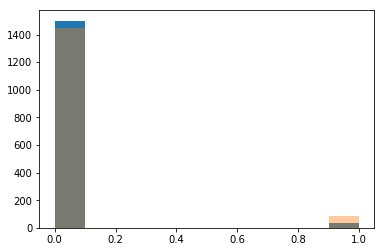

In [301]:
# Train an ML model

#clf = RandomForestClassifier(n_estimators=100, class_weight = {0: 1, 1: 1})
clf = RandomForestClassifier(n_estimators=100)
clf.fit(X_train,y_train)

# Predict
y_pred = clf.predict(X_test)
y_score = clf.predict_proba(X_test)

# Evaluate
plt.hist(y_pred)
plt.hist(y_test,alpha= 0.4)

print(classification_report(y_pred,y_test))

0.86745744046253381

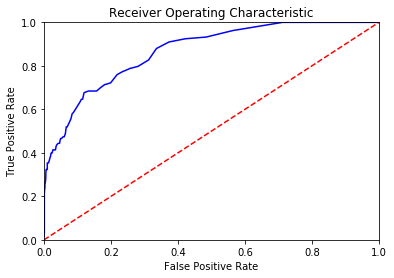

In [289]:
# ROC curve to better guage model performance

fpr, tpr, threshold = roc_curve(y_test, y_score[:,1])
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

roc_auc_score(y_test,y_score[:,1])

             precision    recall  f1-score   support

          0       0.74      0.99      0.85      1085
          1       0.84      0.16      0.26       448

avg / total       0.77      0.74      0.68      1533



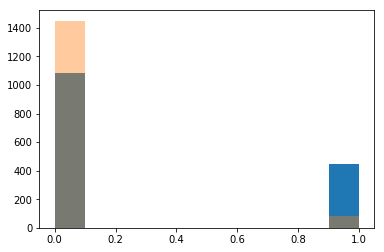

In [308]:
from imblearn.ensemble import BalancedBaggingClassifier

clf = BalancedBaggingClassifier(random_state=42,n_estimators=100,bootstrap=True)
clf.fit(X_train,y_train)

# Predict
y_pred = clf.predict(X_test)
y_score = clf.predict_proba(X_test)

# Evaluate
plt.hist(y_pred)
plt.hist(y_test,alpha= 0.4)

print(classification_report(y_pred,y_test))